# About the Dataset

The dataset consist of X-Ray images which may be normal or may indicate Pneumonia. The task is to classify images into the two classes. The data used here is a subset of the original data which may be found  at https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

The data is divided into Train and Test with around 1000 images per class for Training and 300 images per class for the Test set.

In [48]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.io import imread
from sklearn import svm,metrics
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split

from PIL import Image

In [31]:
from PIL import Image
from pathlib import Path

def load_subset(src_dir, num_samples_per_class):
    image_dir = Path(src_dir)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    class_index_map = {}
    
    flat_data = []
    target = []
    data = []
    
    for i, direc in enumerate(folders):
        #print(str(direc))
        dirpath = str(direc)
        dirname = dirpath.split('\\')[-1]
        class_index_map[i] = dirname
        images = os.listdir(dirpath)
        if num_samples_per_class < len(images):
            images = np.random.choice(images, num_samples_per_class)
        
        for (j,img) in enumerate(images):
            im = Image.open(dirpath+'/'+img)
            im = np.array(im.resize((64,64)))
                            
            if np.array(im).shape == (64,64):
                flat_data.append(im.flatten()) 
                target.append(i)
                data.append(im)
            if j%50 == 0:
                print('Read {} images'.format(j))
    return flat_data, target, data, class_index_map

You may experiment with different dataset sizes to assess the impact on the metrics.

In [32]:
num_imgs_per_class = 300
X,y, images, class_index_map = load_subset('./x-ray-data-set/',num_imgs_per_class)
# Use train test split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

Read 0 images
Read 50 images
Read 100 images
Read 150 images
Read 200 images
Read 0 images
Read 50 images
Read 100 images
Read 150 images
Read 200 images
Read 250 images


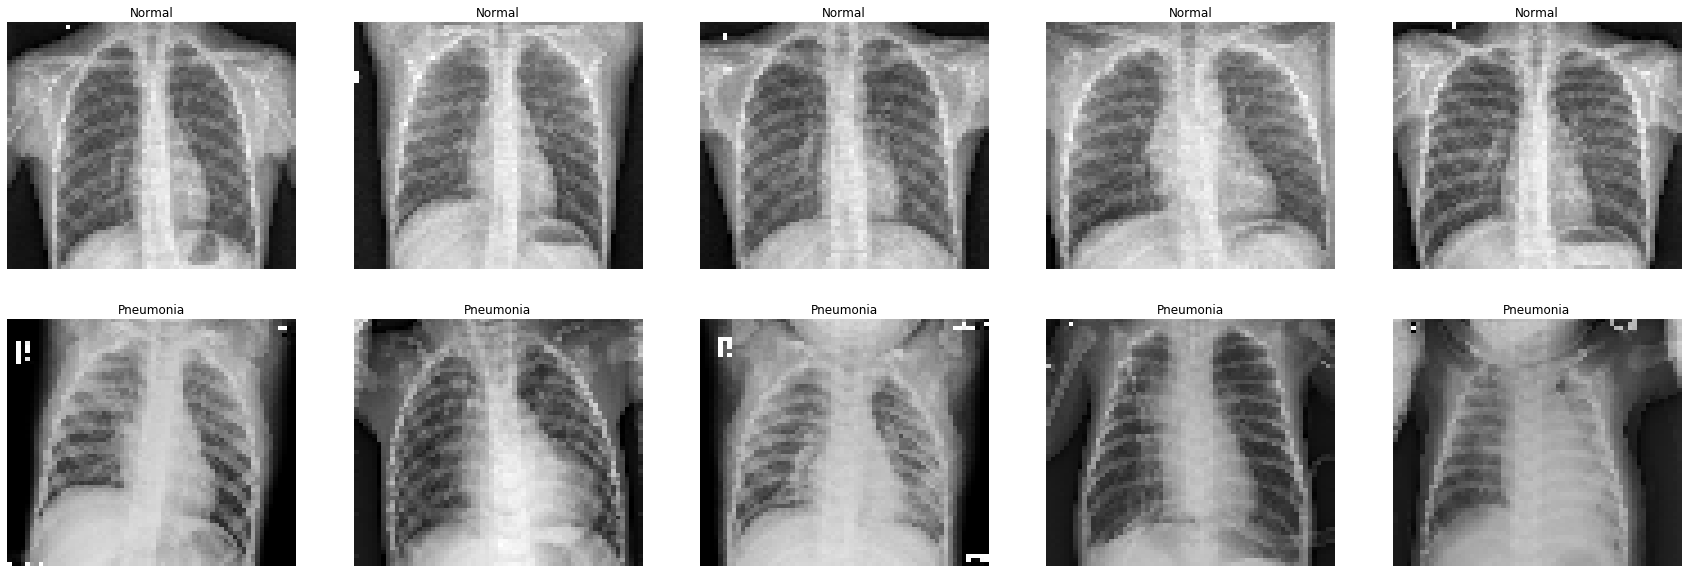

In [33]:
# Get few samples for both the classes
samples = images[:5]+images[num_imgs_per_class:num_imgs_per_class+5]

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    #img = imread(samples[i])
    ax[i//5, i%5].imshow(samples[i], cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Normal")
    else:
        ax[i//5, i%5].set_title("Pneumonia")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [59]:
# Instantiate a classifier and fit it to training data
clf = RandomForestClassifier(max_depth=3, random_state=0)
# clf = svm.LinearSVC(random_state=0, tol=1e-5)
clf.fit(Xtrain, ytrain)

C:\Users\503114150\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

[[51 13]
 [11 59]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        64
           1       0.82      0.84      0.83        70

    accuracy                           0.82       134
   macro avg       0.82      0.82      0.82       134
weighted avg       0.82      0.82      0.82       134

(array([0.      , 0.203125, 1.      ]), array([0.        , 0.84285714, 1.        ]), array([2, 1, 0]))


<IPython.core.display.Javascript object>


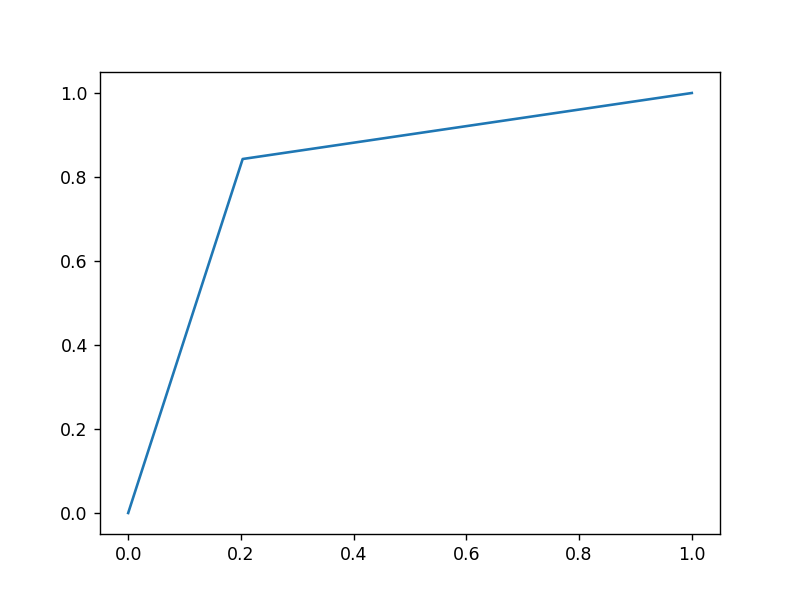

In [60]:
# Prediction on the test data set and measure the performance using metrics
ypred = clf.predict(Xtest)
print(metrics.confusion_matrix(ytest, ypred))
print(metrics.classification_report(ytest, ypred))
roc_curve = metrics.roc_curve(ytest, ypred)
print(roc_curve)
tpr, fpr, t = roc_curve
auc(tpr, fpr)

%matplotlib notebook
from matplotlib import pyplot as plt
plt.plot(tpr,fpr)
plt.show()

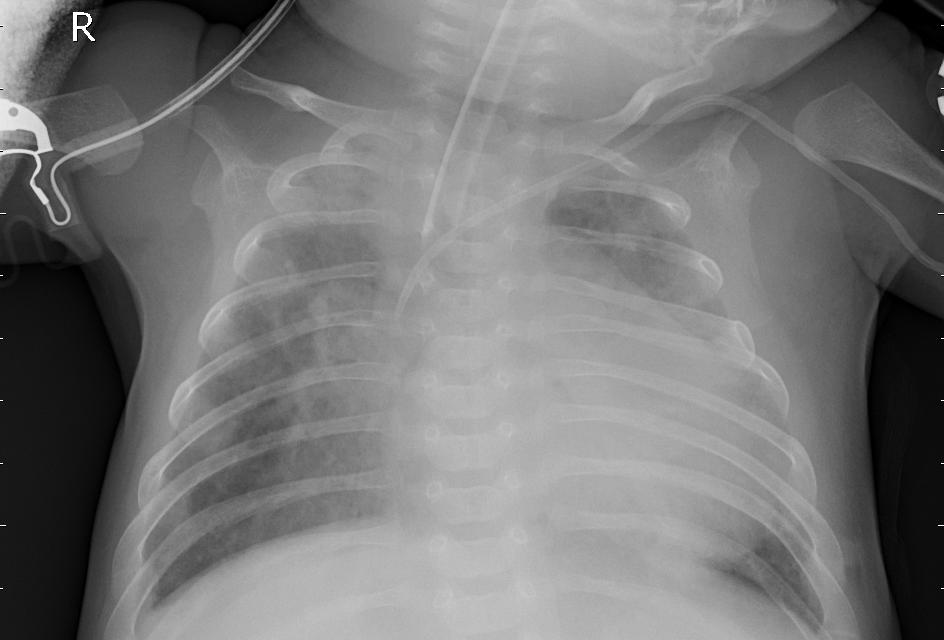

In [52]:
# Try with an image of choice
# Load the image
image_path = "./x-ray-data-set/PNEUMONIA/person1_virus_6.jpeg"
from IPython.display import Image
Image(filename=image_path) 

In [43]:
from PIL import Image
im = Image.open(image_path)
im = np.array(im.resize((64,64)))
im=im.flatten()
im = np.expand_dims(im, axis=0)
label = clf.predict(im) # assuming that the classifier object is named "clf"
print(class_index_map[int(label)])

PNEUMONIA


Try with other classification techniques: SVM, Naive Bayes, KNN etc